# Bag of Words Meets Bags of Popcorn EDA

데이터를 분석하는데 유명한 라이브러리 판다스를 사용해서 분석한다. 

정답이 있는 데이터 셋인 훈련 셋을 가져와 보자.

In [2]:
import pandas as pd

train = pd.read_csv('~/.kaggle/competitions/word2vec-nlp-tutorial/labeledTrainData.tsv')

ParserError: Error tokenizing data. C error: Expected 11 fields in line 4, saw 23


In [3]:
import pandas as pd

train = pd.read_csv('~/.kaggle/competitions/word2vec-nlp-tutorial/labeledTrainData.tsv', delimiter='\t')

In [84]:
train.shape

(25000, 3)

In [85]:
train.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [86]:
train = pd.read_csv('~/.kaggle/competitions/word2vec-nlp-tutorial/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
test = pd.read_csv('~/.kaggle/competitions/word2vec-nlp-tutorial/testData.tsv', header=0, delimiter='\t', quoting=3)

In [87]:
train.head(5)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [88]:
test.head(5)

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [89]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [91]:
test.columns.values

array(['id', 'review'], dtype=object)

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB


In [93]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  # 노트북 안에서 시각화

sentiment = train['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train['sentiment'])

UsageError: unrecognized arguments: # 노트북 안에서 시각화


In [95]:
sentiment[0] # 부정

12500

In [96]:
sentiment[1] # 긍정

12500

In [97]:
len(sentiment)

2

In [98]:
train['review'][0] # HTML 테그가 많다. (불필요한 데이터 삭제 필요)

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [99]:
for i in range(0, 11): 
    print(i) 

0
1
2
3
4
5
6
7
8
9
10


In [100]:
len(train['review'])

25000

In [101]:
# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
from multiprocessing import Pool
import numpy as np
from bs4 import BeautifulSoup


def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [102]:
def  review_to_buautifulsoup(raw_review):
    raw_review = BeautifulSoup(raw_review, 'html.parser').get_text()
    return raw_review

In [103]:
%time train['review'] = apply_by_multiprocessing(train['review'], review_to_buautifulsoup, workers=4)

CPU times: user 106 ms, sys: 143 ms, total: 249 ms
Wall time: 1.2 s


In [104]:
train['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

In [105]:
train['review'][1]

'"\\"The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [106]:
#from bs4 import BeautifulSoup

#for i in range(0, len(train['review'])): # 시간 엄청 걸림
#    train['review'][i] = BeautifulSoup(train['review'][i], 'html.parser').get_text()

In [107]:
train['words'] = train['review'].apply(lambda x: len(str(x).split()))
train['uniq_words'] = train['review'].apply(lambda x: len(set(str(x).split())))

In [108]:
train['words']

0        425
1        158
2        376
3        375
4        367
5         89
6        112
7        132
8        159
9         41
10        48
11       166
12       370
13       122
14       108
15       179
16       387
17       448
18       235
19       112
20       231
21       268
22       254
23        43
24        38
25       141
26       225
27       250
28       670
29       123
        ... 
24970    193
24971    116
24972    425
24973    270
24974    282
24975    135
24976    192
24977    150
24978    308
24979    199
24980     82
24981     69
24982    971
24983    190
24984    130
24985    183
24986    201
24987    311
24988    411
24989    404
24990    239
24991    254
24992     57
24993    505
24994    311
24995     79
24996    174
24997    125
24998    197
24999    184
Name: words, Length: 25000, dtype: int64

In [109]:
train['uniq_words']

0        241
1        116
2        264
3        234
4        265
5         67
6         87
7         97
8        118
9         38
10        43
11       111
12       246
13       101
14        88
15       137
16       259
17       265
18       163
19        88
20       161
21       189
22       190
23        41
24        37
25       111
26       159
27       190
28       378
29        90
        ... 
24970    137
24971     80
24972    275
24973    163
24974    185
24975     93
24976    127
24977    118
24978    203
24979    135
24980     64
24981     54
24982    556
24983    126
24984     98
24985    130
24986    119
24987    200
24988    272
24989    263
24990    165
24991    183
24992     51
24993    327
24994    216
24995     65
24996    120
24997     97
24998    129
24999    125
Name: uniq_words, Length: 25000, dtype: int64

리뷰 단어 평균 값 :  229.71148
리뷰 단어 중간 값 :  172.0
리뷰 유일한 단어 평균 값 :  151.58548
리뷰 유일한 단어 중간 값 :  122.0


/Users/JunChangWook/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'review word unique value distribution')

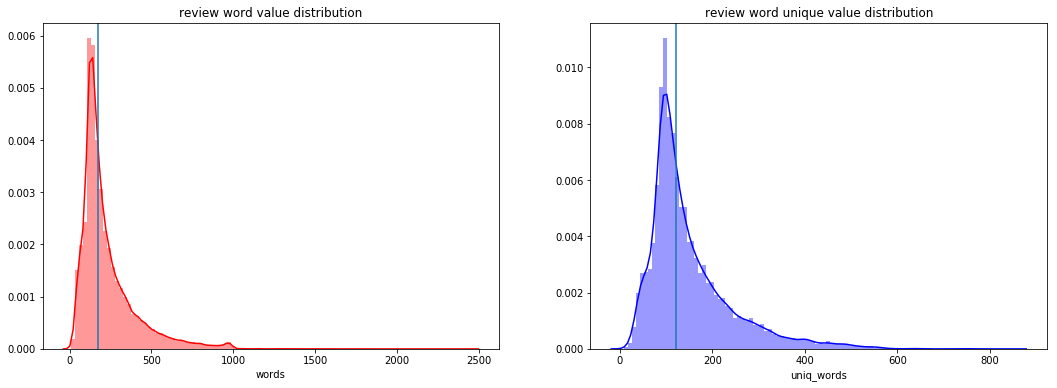

In [122]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)

print('리뷰 단어 평균 값 : ', train['words'].mean())
print('리뷰 단어 중간 값 : ', train['words'].median())
sns.distplot(train['words'], bins=100, color='r', ax=axes[0])
axes[0].axvline(train['words'].median(), linestyle='-')
axes[0].set_title('review word value distribution')

print('리뷰 유일한 단어 평균 값 : ', train['uniq_words'].mean())
print('리뷰 유일한 단어 중간 값 : ', train['uniq_words'].median())
sns.distplot(train['uniq_words'], bins=100, color='b', ax=axes[1])
axes[1].axvline(train['uniq_words'].median(), linestyle='-')
axes[1].set_title('review word unique value distribution')

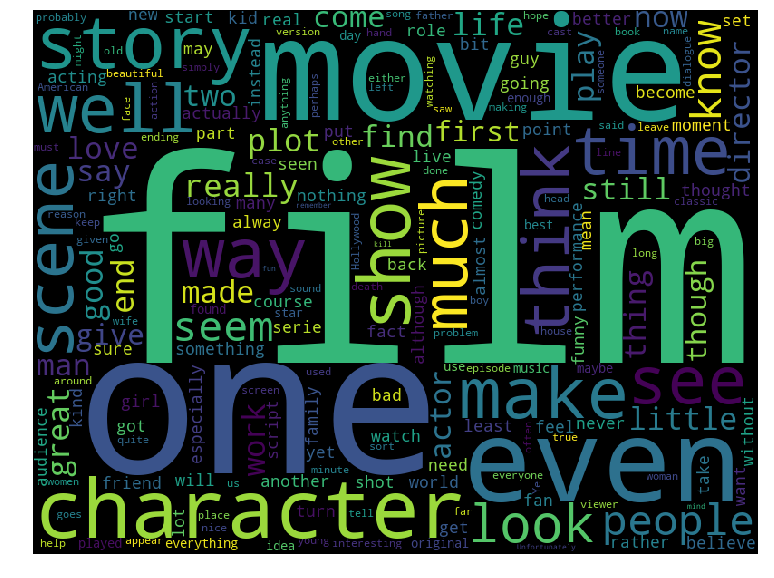

In [121]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()